<a href="https://colab.research.google.com/github/fv00/ProgramingExcercises/blob/main/Ejercicio6Entrevista.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejercicio 6
El archivo train.csv contiene información sobre muchas transacciones con tarjetas de crédito y débito por diferentes canales. Para cada transacción se tiene el valor  monetario de la misma y otras variables (ver diccionario_variables.xlsx). De particular importancia es la variable FRAUDE en donde aparece 1 si la transacción constituyó un fraude o 0 si fue una transacción legítima. Su misión es desarrollar un modelo que permita, a partir de los datos en este archivo predecir cuál será el valor de la variable FRAUDE para una transacción cualquiera. 
El archivo test.csv contiene exactamente las mismas columnas de train.csv, la columna FRAUDE la dejamos en blanco.
1. Cargue el archivo train.csv y Construya un modelo que capaz de realizar 
predicciones de FRAUDE.
2. Enviar un archivo test_evaluado.csv con todas las columnas en el mismo 
orden que se encuentran en test.csv y adicionalmente la columna 
FRAUDE poblada con el valor predicho por su modelo. Cualquier valor real (es decir, fraccionario) entre 0 y 1 será admisible aquí, donde 1 debe 
corresponder a FRAUDE y 0 a transacción legítima.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [ ]:
training = pd.read_csv('train.csv')
fraudulentas = training[training['FRAUDE'] == 1]
fraudulentas.head(20)

,id,FRAUDE,VALOR,HORA_AUX,Dist_max_NAL,Canal1,FECHA,COD_PAIS,CANAL,DIASEM,DIAMES,FECHA_VIN,OFICINA_VIN,SEXO,SEGMENTO,EDAD,INGRESOS,EGRESOS,NROPAISES,Dist_Sum_INTER,Dist_Mean_INTER,Dist_Max_INTER,NROCIUDADES,Dist_Mean_NAL,Dist_HOY,Dist_sum_NAL
0,9000000001,1,0.0,13,659.13,ATM_INT,20150501,US,ATM_INT,5,1,20120306.0,392.0,M,Personal Plus,29.0,1200000.0,1200000.0,1,NaN,NaN,NaN,6,474.94,4552.41,5224.36
1,9000000002,1,0.0,17,594.77,ATM_INT,20150515,US,ATM_INT,5,15,20050415.0,716.0,M,Personal Plus,29.0,5643700.0,500000.0,1,NaN,NaN,NaN,5,289.99,4552.41,2029.90
2,9000000003,1,0.0,13,659.13,ATM_INT,20150501,US,ATM_INT,5,1,20120306.0,392.0,M,Personal Plus,29.0,1200000.0,1200000.0,1,NaN,NaN,NaN,6,474.94,4552.41,5224.36
3,9000000004,1,0.0,13,659.13,ATM_INT,20150501,US,ATM_INT,5,1,20120306.0,392.0,M,Personal Plus,29.0,1200000.0,1200000.0,1,NaN,NaN,NaN,6,474.94,4552.41,5224.36
4,9000000005,1,0.0,0,1.00,ATM_INT,20150510,CR,ATM_INT,0,10,20141009.0,788.0,M,Personal,25.0,0.0,0.0,1,NaN,NaN,NaN,1,NaN,1482.35,1.00
5,9000000006,1,0.0,13,1.00,ATM_INT,20150523,US,ATM_INT,6,23,20150220.0,547.0,M,Emprendedor,20.0,4000000.0,2500000.0,1,NaN,NaN,NaN,1,NaN,4552.41,1.00
6,9000000007,1,0.0,14,659.13,ATM_INT,20150526,CR,ATM_INT,2,26,20080409.0,210.0,M,Personal Plus,29.0,2100000.0,310000.0,2,8616.02,4308.01,4308.01,5,342.47,1482.35,2739.72
7,9000000008,1,0.0,18,733.11,ATM_INT,20150502,US,ATM_INT,6,2,20040520.0,454.0,F,Personal Plus,28.0,2000000.0,200000.0,1,NaN,NaN,NaN,3,400.65,4552.41,2403.90
9,9000000010,1,0.0,15,461.26,ATM_INT,20150502,PA,ATM_INT,6,2,20090330.0,46.0,M,Personal Plus,28.0,4000000.0,1500000.0,1,NaN,NaN,NaN,9,190.22,1043.91,2282.59
10,9000000011,1,0.0,18,238.34,ATM_INT,20150513,CR,ATM_INT,3,13,20100624.0,17.0,F,Personal Plus,26.0,1500000.0,1000000.0,3,16813.90,4203.47,4552.41,2,238.34,1482.35,476.68


In [ ]:
training['SEGMENTO'].value_counts()

Personal Plus    1527
Preferencial      958
Personal          174
Emprendedor       159
PYME              119
Empresarial         4
Name: SEGMENTO, dtype: int64

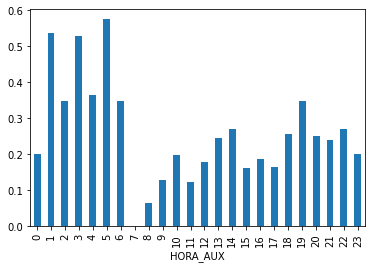

In [ ]:
training.groupby('HORA_AUX')['FRAUDE'].mean().plot.bar()

In [ ]:
training.describe()

,id,FRAUDE,VALOR,HORA_AUX,Dist_max_NAL,DIASEM,DIAMES,FECHA_VIN,OFICINA_VIN,EDAD,INGRESOS,EGRESOS,NROPAISES,Dist_Sum_INTER,Dist_Mean_INTER,Dist_Max_INTER,NROCIUDADES,Dist_Mean_NAL,Dist_HOY,Dist_sum_NAL
count,2.965000e+03,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2.941000e+03,2941.000000,2941.000000,2.941000e+03,2.941000e+03,2965.000000,1418.000000,1418.000000,1418.000000,2965.000000,2508.000000,2965.000000,2965.000000
mean,6.890938e+09,0.246543,5.035695e+05,14.960877,314.656739,3.143002,13.492411,2.000920e+07,416.426386,40.010541,1.449104e+07,8.506309e+06,1.765936,17354.692891,4144.323540,4985.442313,3.943676,196.589282,4379.826287,1765.212887
std,9.739700e+09,0.431071,9.859497e+05,6.348607,295.142673,2.092284,9.134641,9.260427e+04,290.263484,12.976492,5.637311e+07,6.179161e+07,1.042219,25168.020649,1794.829357,2655.081718,2.750021,192.026206,1779.739070,2398.666844
min,2.364560e+06,0.000000,0.000000e+00,0.000000,1.000000,0.000000,1.000000,1.911111e+07,1.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,904.810000,904.810000,904.810000,1.000000,4.480000,0.000000,1.000000
25%,2.552997e+09,0.000000,9.016001e+04,12.000000,24.830000,1.000000,4.000000,1.995102e+07,168.000000,31.000000,2.500000e+06,5.000000e+05,1.000000,6474.200000,3178.210000,4552.410000,2.000000,60.800000,4552.410000,139.870000
50%,6.142884e+09,0.000000,2.435912e+05,16.000000,243.620000,3.000000,15.000000,2.001123e+07,360.000000,38.000000,5.800000e+06,1.800000e+06,1.000000,9104.820000,4552.410000,4552.410000,3.000000,127.700000,4552.410000,836.080000
75%,9.000000e+09,0.000000,5.058190e+05,20.000000,594.770000,5.000000,21.000000,2.008081e+07,659.000000,47.000000,1.274000e+07,4.500000e+06,2.000000,21376.445000,4552.410000,4552.410000,5.000000,269.082500,4552.410000,2533.440000
max,9.330050e+10,1.000000,2.001406e+07,23.000000,1310.460000,6.000000,31.000000,2.015043e+07,967.000000,133.000000,1.940070e+09,1.600000e+09,9.000000,758837.940000,16328.810000,17780.330000,20.000000,1217.570000,21991.200000,18832.060000


In [ ]:
training['FECHA'] = pd.to_datetime(training['FECHA'], format="%Y%m%d")
training['FECHA_VIN'] = pd.to_datetime(training['FECHA_VIN'], format="%Y%m%d")

training.head()

,id,FRAUDE,VALOR,HORA_AUX,Dist_max_NAL,Canal1,FECHA,COD_PAIS,CANAL,DIASEM,DIAMES,FECHA_VIN,OFICINA_VIN,SEXO,SEGMENTO,EDAD,INGRESOS,EGRESOS,NROPAISES,Dist_Sum_INTER,Dist_Mean_INTER,Dist_Max_INTER,NROCIUDADES,Dist_Mean_NAL,Dist_HOY,Dist_sum_NAL
0,9000000001,1,0.0,13,659.13,ATM_INT,2015-05-01,US,ATM_INT,5,1,2012-03-06,392.0,M,Personal Plus,29.0,1200000.0,1200000.0,1,NaN,NaN,NaN,6,474.94,4552.41,5224.36
1,9000000002,1,0.0,17,594.77,ATM_INT,2015-05-15,US,ATM_INT,5,15,2005-04-15,716.0,M,Personal Plus,29.0,5643700.0,500000.0,1,NaN,NaN,NaN,5,289.99,4552.41,2029.90
2,9000000003,1,0.0,13,659.13,ATM_INT,2015-05-01,US,ATM_INT,5,1,2012-03-06,392.0,M,Personal Plus,29.0,1200000.0,1200000.0,1,NaN,NaN,NaN,6,474.94,4552.41,5224.36
3,9000000004,1,0.0,13,659.13,ATM_INT,2015-05-01,US,ATM_INT,5,1,2012-03-06,392.0,M,Personal Plus,29.0,1200000.0,1200000.0,1,NaN,NaN,NaN,6,474.94,4552.41,5224.36
4,9000000005,1,0.0,0,1.00,ATM_INT,2015-05-10,CR,ATM_INT,0,10,2014-10-09,788.0,M,Personal,25.0,0.0,0.0,1,NaN,NaN,NaN,1,NaN,1482.35,1.00


In [ ]:
training['FRAUDE'].value_counts()

0    2234
1     731
Name: FRAUDE, dtype: int64

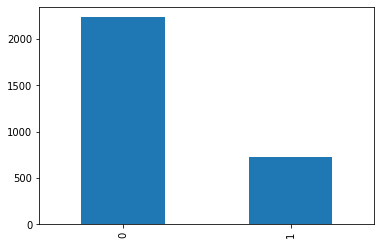

In [ ]:
training['FRAUDE'].value_counts().plot.bar()

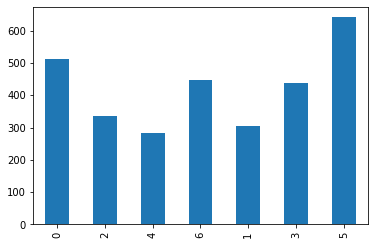

In [ ]:
training['DIASEM'].value_counts(sort=False).plot.bar()

Se observa un ligero desbalanceo respecto a la variable día de la semana que podría interferir en los resultados del modelo.

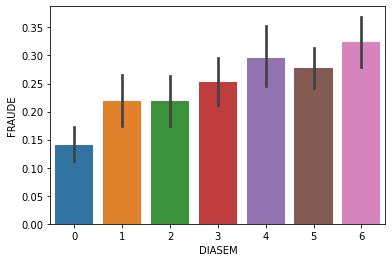

In [ ]:
sns.barplot(data = training, x = "DIASEM", y = "FRAUDE")

In [ ]:
training.groupby("DIASEM")['FRAUDE'].mean()

DIASEM
0    0.140625
1    0.219672
2    0.219585
3    0.252847
4    0.295775
5    0.277691
6    0.324385
Name: FRAUDE, dtype: float64

In [ ]:
training.groupby("CANAL")['FRAUDE'].mean()

CANAL
ATM_INT    0.679245
MCI        0.123333
POS        0.133747
Name: FRAUDE, dtype: float64

In [ ]:
training.groupby("Canal1")['FRAUDE'].mean()

Canal1
ATM_INT    0.679245
POS        0.128381
Name: FRAUDE, dtype: float64

Se propone crear una variable que indique sí el riesgo es notorio:

In [118]:
proporcion_fraudes = training.groupby('COD_PAIS')['FRAUDE'].mean()
cantidad_fraudes = training.groupby('COD_PAIS')['FRAUDE'].sum()
evaluar_oficina = pd.DataFrame({'proporcion' : proporcion_fraudes,
              'cantidad': cantidad_fraudes})
evaluar_oficina['proporcion'] = evaluar_oficina['proporcion']
oficinas_confiables = evaluar_oficina
oficinas_confiables.sort_values(by = ['proporcion', 'cantidad'], ascending=False)

,proporcion,cantidad
COD_PAIS,,
PH,1.000000,15
SV,1.000000,8
FR,1.000000,7
HN,1.000000,7
GB,1.000000,5
IT,1.000000,2
NI,1.000000,2
HK,1.000000,1
CR,0.964286,54


In [114]:
proporcion_fraudes = training.groupby('OFICINA_VIN')['FRAUDE'].mean()
cantidad_fraudes = training.groupby('OFICINA_VIN')['FRAUDE'].count()
evaluar_oficina = pd.DataFrame({'proporcion' : proporcion_fraudes,
              'cantidad': cantidad_fraudes})
evaluar_oficina['proporcion'] = evaluar_oficina['proporcion']
oficinas_confiables = evaluar_oficina[evaluar_oficina['proporcion'] < 0.05]
print(oficinas_confiables['cantidad'].sum())
oficinas_confiables.sort_values(by = ['proporcion', 'cantidad'], ascending=False)


1050


,proporcion,cantidad
OFICINA_VIN,,
929.0,0.048780,41
319.0,0.033333,30
961.0,0.032258,31
967.0,0.030303,33
963.0,0.029412,34
...,...,...
823.0,0.000000,1
825.0,0.000000,1
916.0,0.000000,1


In [ ]:
training.groupby('SEXO')['FRAUDE'].value_counts()

SEXO  FRAUDE
F     0         1042
      1          396
M     0         1146
      1          326
Name: FRAUDE, dtype: int64

Se considera incluir el día de la semana en la que ocurrió la transacción al modelo ya que se observa que la mayoría de transacciones ocurren en los fines de semana, además, en los fines de semana se tiene la mayor proporción de transacciones fraudulentas.

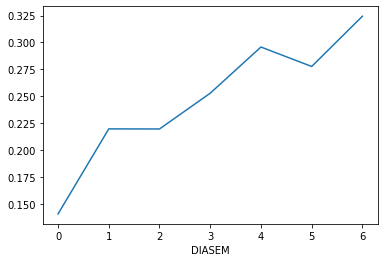

In [135]:
training.groupby('DIASEM')['FRAUDE'].mean().plot()

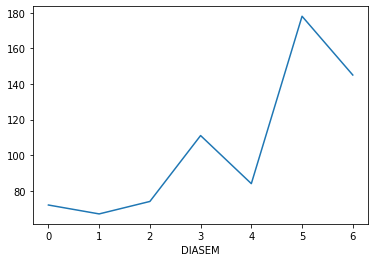

In [134]:
training.groupby('DIASEM')['FRAUDE'].sum().plot()

Se descarta considerar el día del mes en que ocurrió la transacción ya que el posible patrón que evidencia que en los días 9 hay mayor proporción de transacciones puede estar desbalanceado respecto a la cantidad de transacciones que se realizan en dicho día.



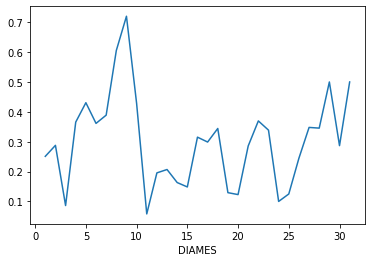

In [140]:
training.groupby('DIAMES')['FRAUDE'].mean().plot()

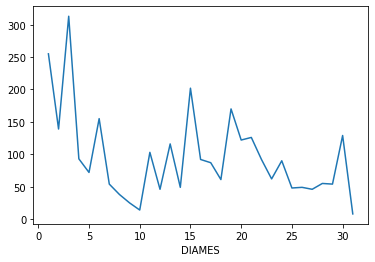

In [139]:
training.groupby('DIAMES')['FRAUDE'].count().plot()

Se descarta considerar que el número de países inside en las transacciones fraudulentas ya que se observa que en todos los niveles a excepción del primero se observa el mismo tipo de comportamiento, esto puede deberse muy posiblemente a un desbalanceo.



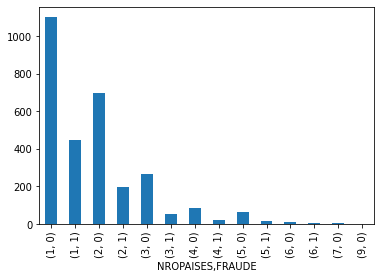

In [133]:
training.groupby(['NROPAISES', 'FRAUDE'])['id'].count().plot.bar()

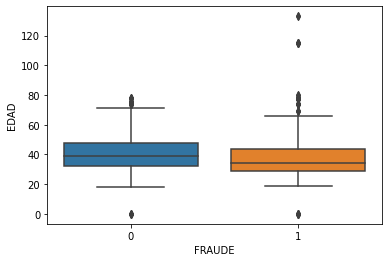

In [141]:
sns.boxplot(data = training, x= "FRAUDE", y="EDAD")

In [190]:
training[['FRAUDE']][(training['EDAD'] < 23) | (training['EDAD'] > 62)].value_counts()

FRAUDE
0         164
1          92
dtype: int64

In [160]:
training['EDAD'].quantile([0.05, 0.95])

0.05    23.0
0.95    61.0
Name: EDAD, dtype: float64

Existe independencia respecto al sexo

In [171]:
training['SEXO'].value_counts()

M    1472
F    1438
Name: SEXO, dtype: int64

Se observa que en promedio las transacciones realizadas en horas más tempranas son transacciones fraudulentas:

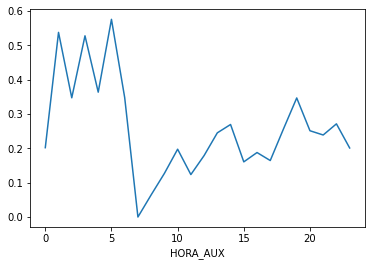

In [178]:
training.groupby('HORA_AUX')['FRAUDE'].mean().plot()

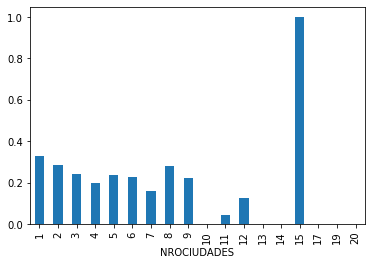

In [196]:
training.groupby('NROCIUDADES')['FRAUDE'].mean().plot.bar()

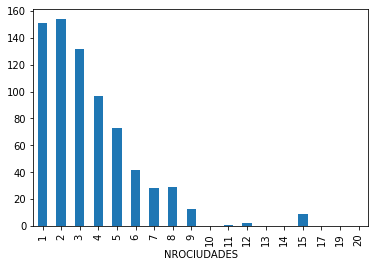

In [197]:
training.groupby('NROCIUDADES')['FRAUDE'].sum().plot.bar()